# cross-validation

## usage

cross-validation is an intuitive, widely used approach for

- model evaluation: calculate test error

- model selection: select model with the lowest validation error

# How to split a data set?

## a bad approach

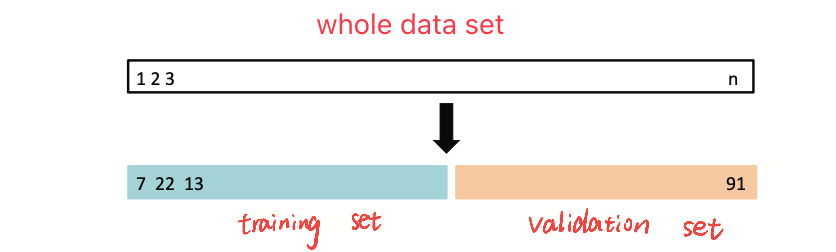

1. randomly divide a dataset into a training set and a validation set

2. fit the model on the training set

3. calculate test error on validation set 

4. repeat

in this approach, test error will be highly variable

what if we only use a fraction of training set to as validation set

## cross-validation

- cross-validation **averages** evaluation metrics over different splits to provide a more realistic assessment of model performance 

- Each data point is only used once in testing but many times in training

### leave-one-out cross-validation (LOOCV) (N-fold cross-validation)

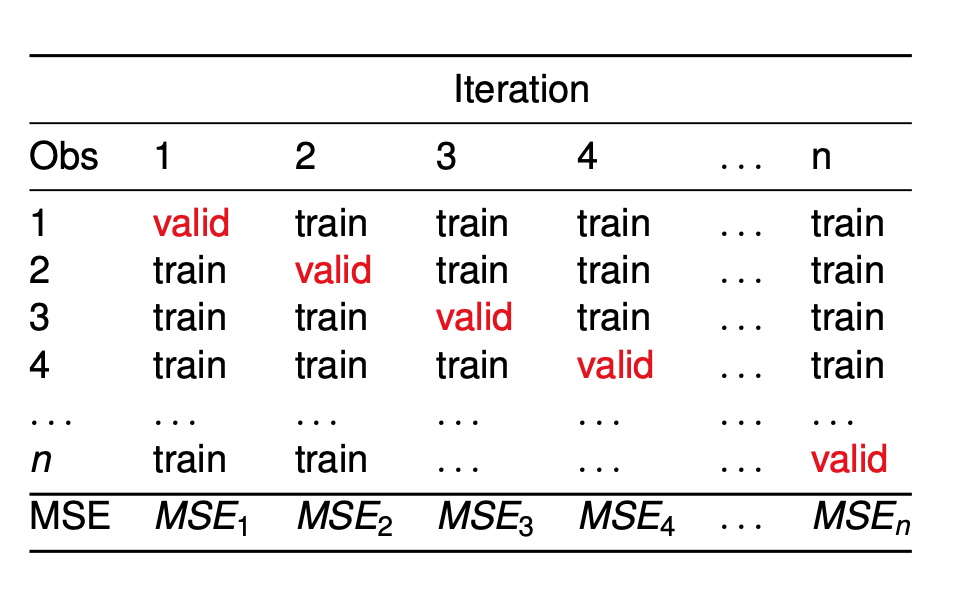

if sample size $n$ is small

we iterate thru the data set for $n$ times, 

for the $i$ th iteration,

- we use a single different observ $(x_i,y_i)$ as validation set, 

- train on the rest $n-1$ observs $\left\{(x_1,y_1),...(x_{i-1},y_{i-1}),(x_{i+1},y_{i+1}),...,(x_n,y_n) \right\}$,

- compute a validation error (mean squared error) $MSE_i$ for $i$ th data point

total test error is

- Regression

$$
CV_{(n)}=\frac{1}{n}\sum_{i=1}^n MSE_i
$$

- Classification

$$
CV_{(n)} =  \frac{1}{n}\sum_{i=1}^n \mathbb{1}(\hat Y_i = Y_i)
$$

### k-fold cross-validation

- gold standard: k = 10

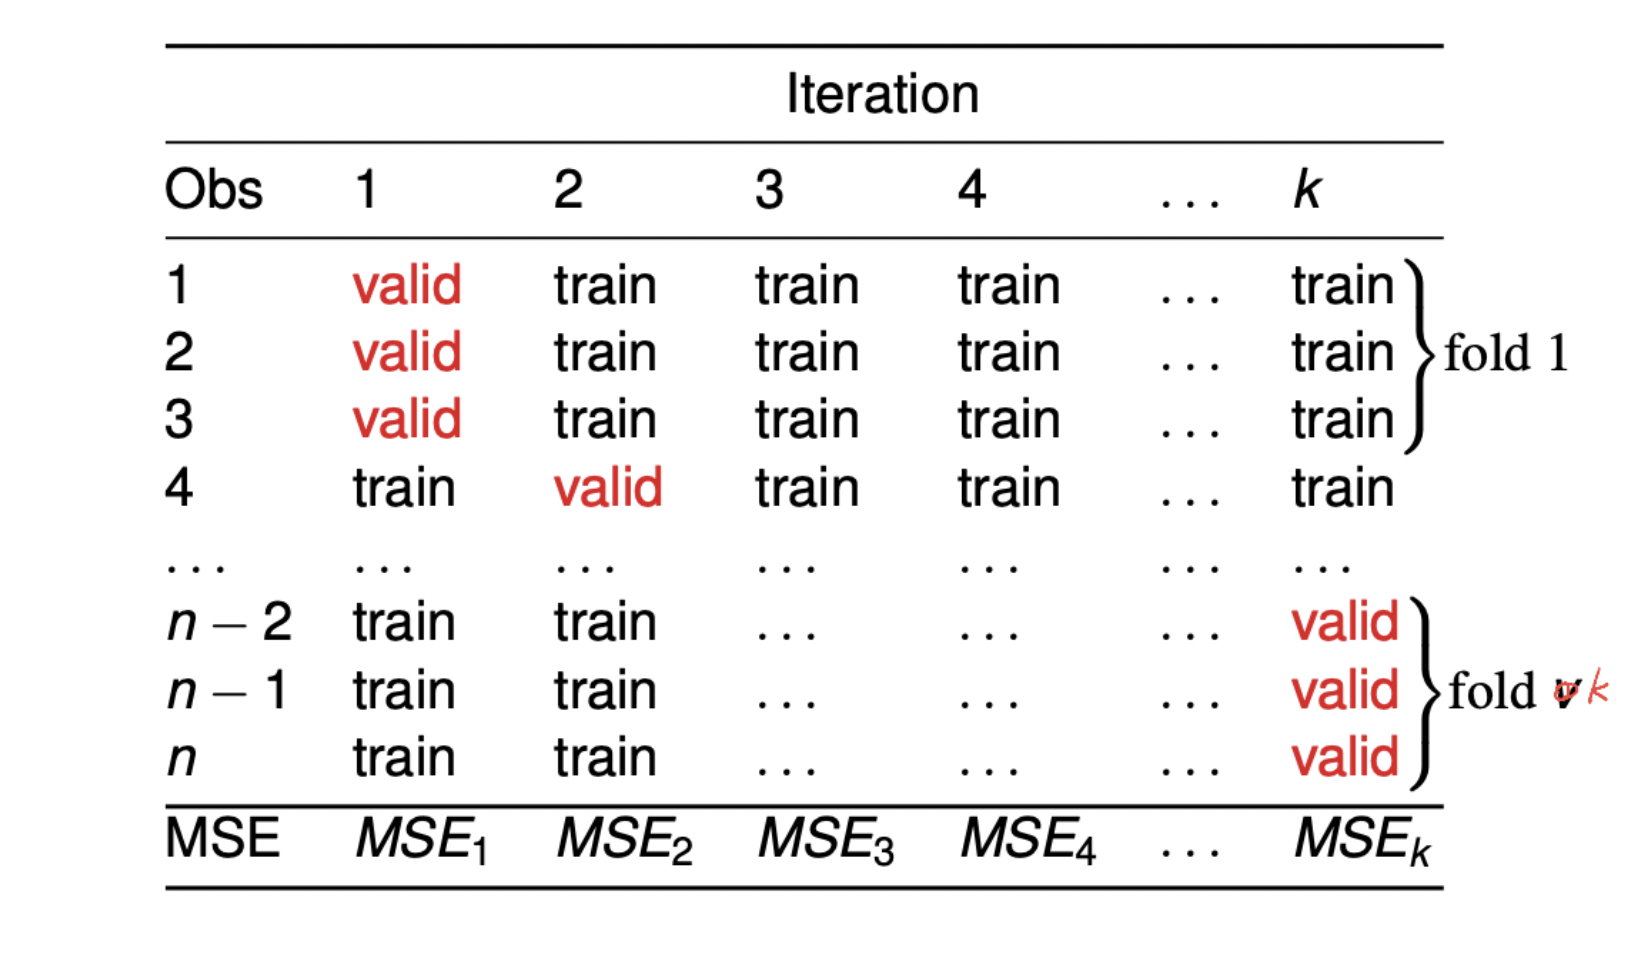

if sample size $n$ is large, to be faster

we randomly shuffle the data and divide the dataset into $k$ folds,

iterate thru the data set for $k$ times,

for the $i$ th iteration,  $i=1,...,k$

- use $i$ th fold as validation set,

- use rest $k-1$ folds as training set

- compute a validation error $MSE_i$ on $i$ th fold

the total test error is:

- Regression

$$
CV_{(k)}=\frac{1}{n}\sum_{i=1}^k n_i MSE_i
$$

- Classification

$$
CV_{(n)} = \frac{1}{n} \sum_{i=1}^k n_i Err_i = \frac{1}{n} \sum_{i=1}^k n_i \frac{\sum_{j=1}^{n_i} \mathbb{1}(\hat Y_j = Y_j)}{n_i}
$$

where $n_i$ is the number of observ in $i$ th fold, $k$ is the number of folds, $n$ is sample size

often **every fold has same size**, $n_i=\frac{n}{k}$

then the total test error reduced to:

- Regression

$$
CV_{(k)}=\frac{1}{k}\sum_{i=1}^k MSE_i
$$

- Classification

$$
CV_{(k)}=\frac{1}{k}\sum_{i=1}^k Err_i
$$

- Cautious with **time series**

    should **NOT** randomly shuffle our data,

    i.e. should NOT train on future data and test on past data

## a shortcut for linear regression

suppuse the fitted values $\hat Y$ can be written as 

$$
\hat Y=LY
$$ 

where $L$ is a $n \times n$ matrix

$$
L=X(X^TX)^{-1}X^T
$$

the leave-one-out cross validation error (empirical risk of MSE) is

$$
R_{LOO}=\frac{1}{n}\sum _{i=1}^n \left(Y_i - \hat Y_{(-i)} \right)^2=\frac{1}{n}\sum _{i=1}^n \left(\frac{Y_i - \hat Y_i}{1-  L_{ii}} \right)^2
$$

where $L_{ii}$ is the ith diagonal entry of matrix $L$

$Y_i $ is the true value of Y of ith observ

$\hat Y_{(-i)}$ is the estimated value of ith observ of Y trained on **full data set excluding ith observ**

$\hat Y_i$ is the estimated value of ith observ of Y trained on **full data set**


the equation shows that we don't need to do $n$ iterations,

we only need $1$ iteration (fit the model for 1 time)

# model selection

## a unsafe way: have 2 sets

suppose we have a set of models $\left\{M_1, M_2,...,M_m\right\}$

Model1 linear model: $\hat y=\hat \beta_0 +\hat \beta_1 x$

Model2 log model: $log(\hat y)=\hat \beta_0 +\hat \beta_1 x$

Model3 quadratic model: $\hat y=\hat \beta_0 +\hat \beta_1 x +\hat \beta_2 x^2 $

for each model $M_i$, calculate k-fold CV validation error

choose model $M_{min}$ with the lowest validation error

use model $M_{min}$ to train on the full dataset, learn params of model $M_{min}$


- if many models have similar low validation error (±1 standard deviation of lowest validation error)

    pick the model with **lowest complexity**, 
    
    e.g., KNN, **larger k**; polynomials, **smaller degree of polynomial**

- we shouldn't report the lowest validation error as model performance measure

    bc we use validation set to pick model,
    
    this may cause underestimate of error (**over-optimistic**)

## a safer way: have 3 sets

$$
\left\{\begin{matrix}
\text{training set} & \left\{\begin{matrix}
\text{true training set}\\ 
\text{validation set: model selection and hyperparameter tuning}
\end{matrix}\right.\\ 
\text{true test set: model evaluation}
\end{matrix}\right.
$$

- expected training error <= expected test/generalization error

- The third dataset (test set) is untouched, used to report an unbiased test error